In [135]:
import math

# python3 -m pip install opencv-python
import cv2 # opencv
import numpy as np
import sys

from scipy.signal import convolve2d
from scipy.ndimage.filters import gaussian_filter

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.axes_grid1 import make_axes_locatable
from itertools import groupby

In [136]:
%matplotlib inline

In [137]:
def imshow_with_colorbar(index, img):
    plt.figure(index)
    ax = plt.subplot(111)
    im = ax.imshow(img)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)

In [138]:
def get_segment_coordinates(y, x):
  xc = np.array([x, x+1, x+2, x+3, x+3, x+3, x+2, x+1, x, x-1, x-2, x-3, x-3, x-3, x-2, x-1])
  yc = np.array([y-3, y-3, y-2, y-1, y, y+1, y+2, y+3, y+3, y+3, y+2, y+1, y, y-1, y-2, y-3])
  return yc, xc

In [146]:
def feature_detect(img, threshold = 80):
  h,w = img.shape
  filtered_coordinates = []
  for y in range(3, h-3):
      for x in range(3, w-3):
          # current_point = x,y
          vector = ((img[get_segment_coordinates(y, x)].astype(np.int) - img[y, x].astype(np.int)) > threshold).astype(np.uint8)
          # Identical Consecutive Grouping in list 
          # using groupby() + list comprehension 
          result = [list(b) for a, b in groupby(vector)]
          # print(result)
          if any(len(elem) >= 3 and len(elem) <= 13 for elem in result):
            filtered_coordinates.append((y,x))
  return filtered_coordinates

In [140]:
img = cv2.imread('lenna.png', cv2.IMREAD_GRAYSCALE)
kpts = feature_detect(img)

25000 pixel from 255025
25000 pixel from 255025
50000 pixel from 255025
25000 pixel from 255025
50000 pixel from 255025
75000 pixel from 255025
50000 pixel from 255025
75000 pixel from 255025
100000 pixel from 255025
75000 pixel from 255025
100000 pixel from 255025
125000 pixel from 255025
150000 pixel from 255025
175000 pixel from 255025
150000 pixel from 255025
200000 pixel from 255025
225000 pixel from 255025
250000 pixel from 255025


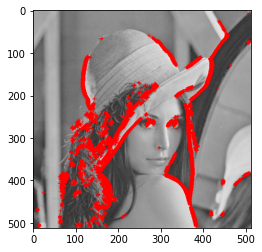

In [141]:
img_out = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
# cv2.drawKeypoints(img, kpts, img_out)
for kpt in kpts:
    y = int(kpt[0])
    x = int(kpt[1])
    cv2.line(img_out, (x-4,y), (x+4,y), (255,0,0))
    cv2.line(img_out, (x,y-4), (x,y+4), (255,0,0))

plt.imshow(img_out)

**Gaussian** method is used for several purposes. One of them is that if the image has a lot of noise, Gaussian blur can mute that noise and smooth the image. After applying this method feature detector finds less pixels. 
**Downsizing** (decreased image size) has similar effects to the method above but can't be used for very small size. Resizing the image to 64*64 size isn't accepatable for feature detection.

**Downsizing with Gaussian** combines both methods above and shows the most important features.

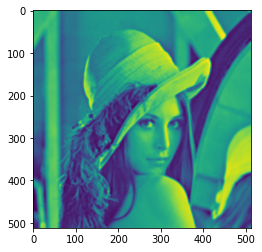

In [153]:
# apply Guassian blur on src image
image = cv2.imread('lenna.png', cv2.IMREAD_GRAYSCALE)
gaussian_img_5 = cv2.GaussianBlur(image,(5,5),cv2.BORDER_DEFAULT)
kpts_5 = feature_detect(gaussian_img_5)
plt.imshow(gaussian_img_5)

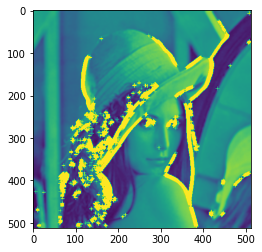

In [154]:
for kpt in kpts:
    y = int(kpt[0])
    x = int(kpt[1])
    cv2.line(gaussian_img_5, (x-4,y), (x+4,y), (255,0,0))
    cv2.line(gaussian_img_5, (x,y-4), (x,y+4), (255,0,0))

plt.imshow(gaussian_img_5)

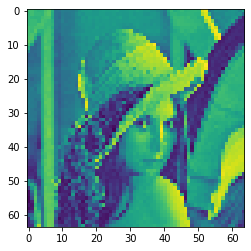

In [168]:
# Resizing
image = cv2.imread('lenna.png', cv2.IMREAD_GRAYSCALE)
resized_image = cv2.resize(image, (64, 64), interpolation=cv2.INTER_NEAREST)
kpts = feature_detect(resized_image)
plt.imshow(resized_image)

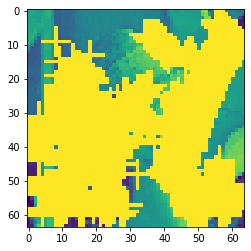

In [169]:
for kpt in kpts:
    y = int(kpt[0])
    x = int(kpt[1])
    cv2.line(resized_image, (x-4,y), (x+4,y), (255,0,0))
    cv2.line(resized_image, (x,y-4), (x,y+4), (255,0,0))

plt.imshow(resized_image)

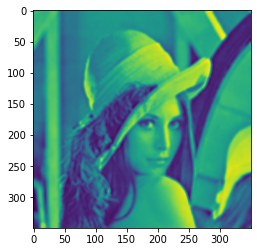

In [170]:
# Resizing with Gaussian
image = cv2.imread('lenna.png', cv2.IMREAD_GRAYSCALE)
resized_image = cv2.resize(image, (350, 350), interpolation=cv2.INTER_NEAREST)
gaussian_img_res = cv2.GaussianBlur(resized_image,(5,5),cv2.BORDER_DEFAULT)
kpts_res = feature_detect(gaussian_img_res)
plt.imshow(gaussian_img_res)

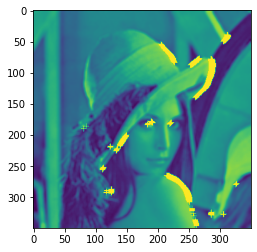

In [171]:
for kpt in kpts_res:
    y = int(kpt[0])
    x = int(kpt[1])
    cv2.line(gaussian_img_res, (x-4,y), (x+4,y), (255,0,0))
    cv2.line(gaussian_img_res, (x,y-4), (x,y+4), (255,0,0))

plt.imshow(gaussian_img_res)